Explainable Deep Learning Based Decision Support system for Colon Cancer Detection using CT Scan Images

In [2]:
# Step 1 - Dataset Understanding and setup
# Step 2 - Data Preprocessing
# Step 3 - Model Selection
# Step 4 - Model Training
# Step 5 - Model Evaluation
# Step 6 - Explainability with Grad-CAM
# Step 7 - Analysis of Explainability
# Step 8 - Simple Web Interface

# Step 1 - Dataset Understanding and setup

1. Dataset Structure

Dataset is split into train, validation, and test directories.
Each split contains two classes:
    cancerous
    non-cancerous
This structure supports supervised learning, tuning, and unbiased evaluation.

2. Class Distribution (Moderate Imbalance)

Train : 
    Cancerous: 3176
Non-cancerous: 4761

Validation : 
    Cancerous: 681
Non-cancerous: 1020

Test : 
    Cancerous: 681
Non-cancerous: 1021

The imbalance reflects real clinical data and is handled via data augmentation during training, not via oversampling or synthetic labels.

3. Image Characteristics

Format: PNG
Resolution: 512 × 512
Bit depth: 32-bit
High resolution and high bit depth preserve fine-grained CT intensity information.

4. Slice Orientation

Majority of images are axial CT slices
A small number of coronal slices exist
All slices are retained to:
avoid unnecessary data loss
preserve diversity
Decision explicitly justified

5. Problem Scope

Slice-level classification, not patient-level diagnosis
Each CT slice is treated as an independent sample
Different slices from the same patient may have different predictions
This matches real medical practice

6. Doctor-in-the-Loop System

Model acts as a decision support tool
Workflow:
Doctor identifies suspicious slice
Model predicts cancerous / non-cancerous
Grad-CAM provides visual explanation
Final decision remains with doctor

# Step 2 - Data Preprocessing

1. Input size
2. Intensity Normalization
3. Data Augumentation
4. Label Encoding

In [24]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [25]:
#location of dataset addresses
train_dir = r"D:\PROJECT\DATASET\ColonCancerCT-2025 A Dataset of Abdominal CT Scans\Split_Data\Split_Data\train"
val_dir   = r"D:\PROJECT\DATASET\ColonCancerCT-2025 A Dataset of Abdominal CT Scans\Split_Data\Split_Data\val"
test_dir  = r"D:\PROJECT\DATASET\ColonCancerCT-2025 A Dataset of Abdominal CT Scans\Split_Data\Split_Data\test"

In [26]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [28]:
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0
)

In [29]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0
)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

Found 7937 images belonging to 2 classes.


In [31]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 1701 images belonging to 2 classes.


In [32]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 1702 images belonging to 2 classes.


In [33]:
#checking for label encoding
print("Class indices:", train_generator.class_indices)

Class indices: {'Non_Cancer': 0, 'cancer': 1}


In [34]:
#checking for image size
images, labels = next(train_generator)
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


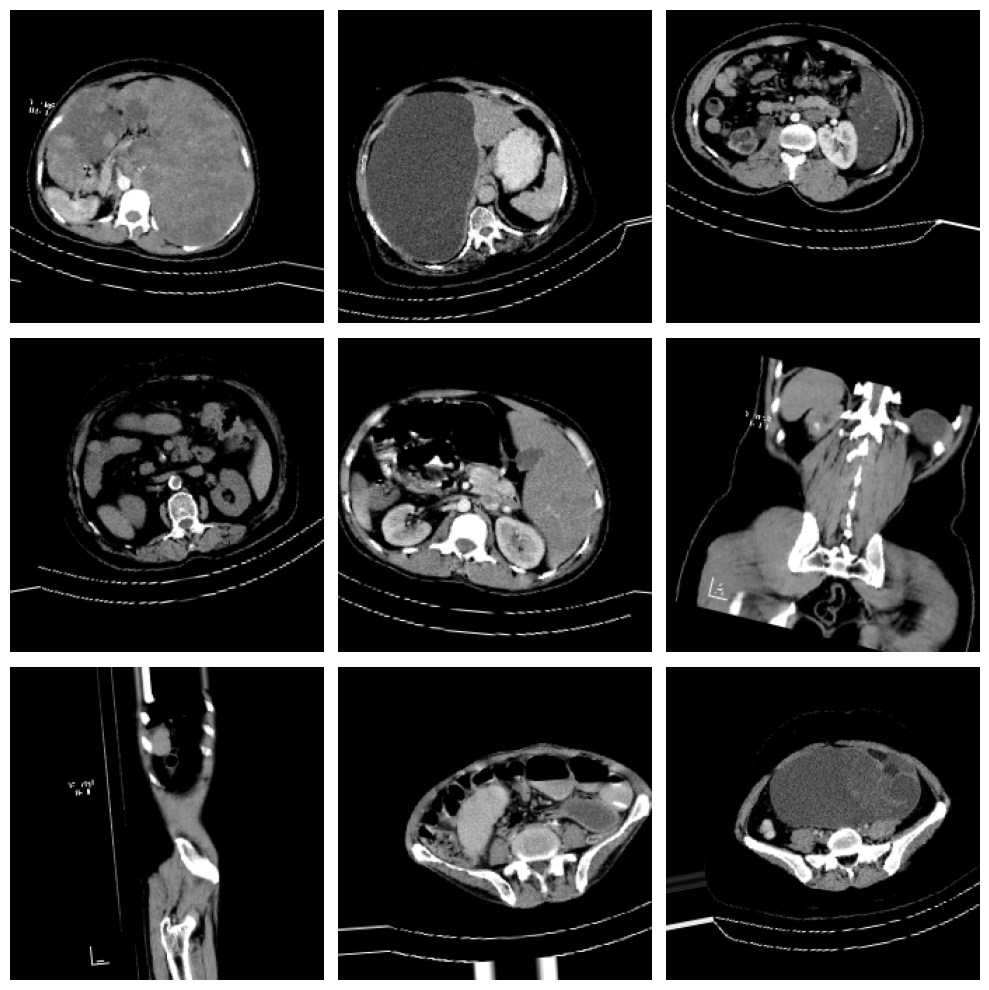

In [35]:
#checking for data augumentation
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

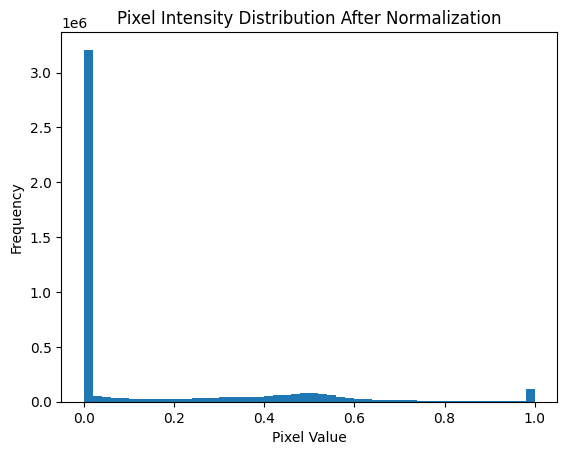

In [36]:
#checking for normalized intensities
import matplotlib.pyplot as plt

plt.hist(images.flatten(), bins=50)
plt.title("Pixel Intensity Distribution After Normalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
